In [118]:
# x,y,w,h = cv2.boundingRect(contours[max_val])
# frame = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),3)
frame=cv2.drawContours(frame, contours, -1, 255, 3)

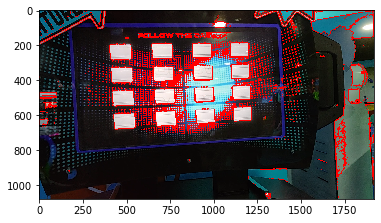

In [119]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [117]:
max_val=0
max_area=0
for i in range(len(contours)):
    area = cv2.contourArea(contours[i])
    if(area > max_area):
        max_val = i
        max_area=area

In [82]:
import cv2

In [83]:
cap= cv2.VideoCapture('1.mp4')

In [109]:
ret,frame = cap.read()

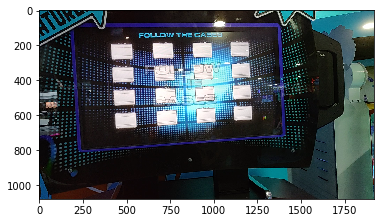

In [110]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [86]:
frame.shape

(1080, 1920, 3)

In [87]:
full = frame.copy()
frame = cv2.pyrDown(frame)
frame = cv2.pyrDown(frame)

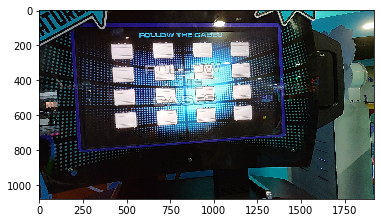

In [88]:
plt.imshow(full)

In [36]:
imgray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
imgray = cv2.adaptiveThreshold(imgray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

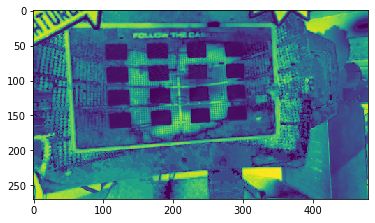

In [89]:
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
plt.imshow(hsv[:,:,1])

In [288]:
import cv2
import matplotlib.pyplot as plt
cap= cv2.VideoCapture('1.mp4')



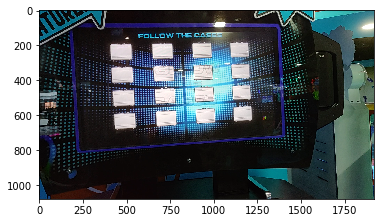

In [289]:
for i in range(5):
    ret,frame = cap.read()
    full = frame.copy()
    plt.imshow(full)


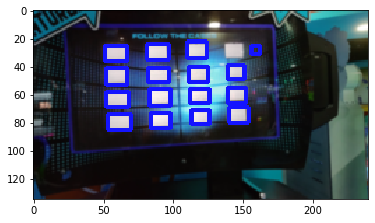

In [192]:
frame = full.copy()
frame = cv2.pyrDown(frame)
frame = cv2.pyrDown(frame)
frame = cv2.pyrDown(frame)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
import numpy as np
kernel = np.ones((5,5))
mask = cv2.inRange(hsv,(0,0,0),(255,30,255))
erode = cv2.erode(mask,kernel)
dilate = cv2.dilate(erode,kernel)
mask = dilate

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
cntsSorted = sorted(cnts, key=lambda x: cv2.contourArea(x))

remove = []
for i in range(len(cntsSorted)):
    x,y,w,h = cv2.boundingRect(cntsSorted[i])
    if((x+h/2 < 0.2*frame.shape[1]) or (x+h/2 > 0.8*frame.shape[1]) or (y+w/2 < 0.2*frame.shape[0]) or (y+w/2 > 0.8*frame.shape[0])):
        remove.append(i)
for i in range(1,len(remove)-1):
    del cntsSorted[remove[-i]]
if(len(cntsSorted)>0 and len(remove)>0):
    del cntsSorted[remove[0]]
# C_max = max(cnts,key = cv2.contourArea)
for i in range(min(len(cntsSorted),16)):
    x,y,w,h = cv2.boundingRect(cntsSorted[-i])
    cv2.rectangle(frame,(x,y),(x+w,y+h),(20,20,255),2)
plt.imshow(frame)

In [193]:
len(cntsSorted)

17

In [194]:
rects = []
for i in range(min(len(cntsSorted),16)):
    x,y,w,h = cv2.boundingRect(cntsSorted[-i])
    rects.append([x,y,w,h])

In [195]:
rects

[[156, 25, 6, 6],
 [53, 74, 17, 11],
 [51, 25, 16, 11],
 [52, 58, 16, 11],
 [83, 56, 15, 12],
 [52, 41, 15, 12],
 [81, 24, 16, 11],
 [110, 22, 14, 12],
 [111, 40, 14, 11],
 [82, 41, 15, 10],
 [84, 73, 14, 11],
 [140, 69, 14, 11],
 [112, 56, 14, 10],
 [139, 55, 13, 11],
 [113, 71, 13, 10],
 [139, 39, 12, 10]]

In [221]:
area = []
for i in rects:
    area.append(i[2]*i[3])
    print(i[2]*i[3])

176
180
180
176
168
154
150
154
154
140
143
130
120


In [222]:
area

[176, 180, 180, 176, 168, 154, 150, 154, 154, 140, 143, 130, 120]

In [223]:
import numpy as np
mean = np.mean(area)
std = np.std(area)
stats_z = [(s - mean)/std for s in area]
rects = [d for (d, remove) in zip(rects, np.abs(stats_z) > 3) if not remove]


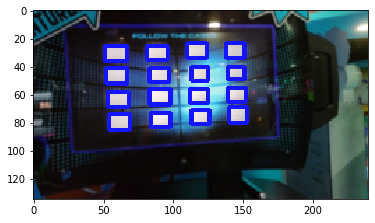

In [185]:
frame = full.copy()
frame = cv2.pyrDown(frame)
frame = cv2.pyrDown(frame)
frame = cv2.pyrDown(frame)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
import numpy as np
kernel = np.ones((5,5))
mask = cv2.inRange(hsv,(0,0,0),(255,20,255))
erode = cv2.erode(mask,kernel)
dilate = cv2.dilate(erode,kernel)
mask = dilate

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
cntsSorted = sorted(cnts, key=lambda x: cv2.contourArea(x))

remove = []
for i in range(len(cntsSorted)):
    x,y,w,h = cv2.boundingRect(cntsSorted[i])
    if((x+h/2 < 0.2*frame.shape[1]) or (x+h/2 > 0.8*frame.shape[1]) or (y+w/2 < 0.2*frame.shape[0]) or (y+w/2 > 0.8*frame.shape[0])):
        remove.append(i)
for i in range(1,len(remove)-1):
    del cntsSorted[remove[-i]]
if(len(cntsSorted)>0 and len(remove)>0):
    del cntsSorted[remove[0]]
# C_max = max(cnts,key = cv2.contourArea)
for i in range(min(len(cntsSorted),16)):
    x,y,w,h = cv2.boundingRect(cntsSorted[-i])
    cv2.rectangle(frame,(x,y),(x+w,y+h),(20,20,255),2)
plt.imshow(frame)

In [248]:
def get_iou(x, y):
    boxA=4*[0]
    boxB=4*[0]
    boxA[0] = x[0]
    boxA[1] = x[1]
    boxA[2] = x[2]+x[0]
    boxA[3] = x[3]+x[1]
    
    boxB[0] = y[0]
    boxB[1] = y[1]
    boxB[2] = y[2]+y[0]
    boxB[3] = y[3]+y[1]
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
 
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
 
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
 
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
 
    # return the intersection over union value
    return iou

In [249]:
get_iou(rects[0],rects[0])

1.0

16


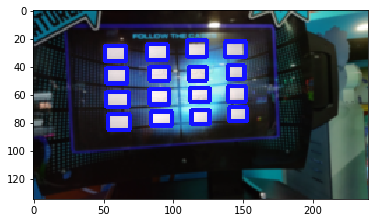

In [294]:
import numpy as np

rects=[]
# First Run 
frame = full.copy()
frame = cv2.pyrDown(frame)
frame = cv2.pyrDown(frame)
frame = cv2.pyrDown(frame)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

kernel = np.ones((5,5))
mask = cv2.inRange(hsv,(0,0,0),(255,30,255))
erode = cv2.erode(mask,kernel)
dilate = cv2.dilate(erode,kernel)
mask = dilate

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
cntsSorted = sorted(cnts, key=lambda x: cv2.contourArea(x))

remove = []
for i in range(len(cntsSorted)):
    x,y,w,h = cv2.boundingRect(cntsSorted[i])
    if((x+h/2 < 0.2*frame.shape[1]) or (x+h/2 > 0.8*frame.shape[1]) or (y+w/2 < 0.2*frame.shape[0]) or (y+w/2 > 0.8*frame.shape[0])):
        remove.append(i)
for i in range(1,len(remove)-1):
    del cntsSorted[remove[-i]]
if(len(cntsSorted)>0 and len(remove)>0):
    del cntsSorted[remove[0]]
# C_max = max(cnts,key = cv2.contourArea)
for i in range(min(len(cntsSorted),16)):
    x,y,w,h = cv2.boundingRect(cntsSorted[-i])
    rects.append([x,y,w,h])

# Cleaning : 
area = []
for i in rects:
    area.append(i[2]*i[3])
mean = np.mean(area)
std = np.std(area)
stats_z = [(s - mean)/std for s in area]
rects = [d for (d, remove) in zip(rects, np.abs(stats_z) > 2) if not remove]
    
    
### Second Runs 
threshold = 0.85
val = range(20,40)
for j in val:
    rects_temp=[]
    frame = full.copy()
    frame = cv2.pyrDown(frame)
    frame = cv2.pyrDown(frame)
    frame = cv2.pyrDown(frame)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    kernel = np.ones((5,5))
    mask = cv2.inRange(hsv,(0,0,0),(255,j,255))
    erode = cv2.erode(mask,kernel)
    dilate = cv2.dilate(erode,kernel)
    mask = dilate

    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2]
    cntsSorted = sorted(cnts, key=lambda x: cv2.contourArea(x))

    remove = []
    for i in range(len(cntsSorted)):
        x,y,w,h = cv2.boundingRect(cntsSorted[i])
        if((x+h/2 < 0.2*frame.shape[1]) or (x+h/2 > 0.8*frame.shape[1]) or (y+w/2 < 0.2*frame.shape[0]) or (y+w/2 > 0.8*frame.shape[0])):
            remove.append(i)
    for i in range(1,len(remove)-1):
        del cntsSorted[remove[-i]]
    if(len(cntsSorted)>0 and len(remove)>0):
        del cntsSorted[remove[0]]
    # C_max = max(cnts,key = cv2.contourArea)
    for i in range(min(len(cntsSorted),16)):
        x,y,w,h = cv2.boundingRect(cntsSorted[-i])
        rects_temp.append([x,y,w,h])
    # Cleaning : 
    area = []
    for i in rects_temp:
        area.append(i[2]*i[3])
    mean = np.mean(area)
    std = np.std(area)
    stats_z = [(s - mean)/std for s in area]
    rects_temp = [d for (d, remove) in zip(rects_temp, np.abs(stats_z) > 2) if not remove]
    left = rects_temp.copy()
    for i in range(len(rects)):
        for k in range(len(rects_temp)):
            if(get_iou(rects[i],rects_temp[k]) > threshold):
                for t in range(len(rects[i])):
                    rects[i][t] = 0.5*(rects[i][t] +rects_temp[k][t])
                try :
                    left.remove(rects_temp[k])
                except :
                    pass
    while(len(rects)<16 and len(left) > 0):
        rects.append(left.pop(0))
    # Cleaning : 
    area = []
    for i in rects:
        area.append(i[2]*i[3])
    mean = np.mean(area)
    std = np.std(area)
    stats_z = [(s - mean)/std for s in area]
    rects = [d for (d, remove) in zip(rects, np.abs(stats_z) > 2) if not remove]

print(len(rects))
for i in range(len(rects)):
    x,y,w,h = rects[i]
    x,y,w,h = int(x),int(y),int(w),int(h)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(20,20,255),2)
    plt.imshow(frame)

In [258]:
d

5

In [231]:
a = [[2,3],[4,5]]

In [228]:
a.remove([2,3])

In [234]:
c,d = a[0]

In [41]:
new = cntsSorted[-5:]
framecpy = frame.copy()

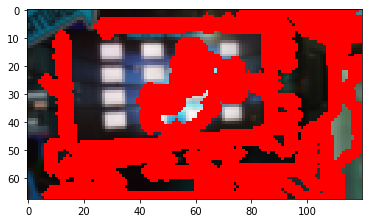

In [42]:
cv2.drawContours(framecpy, new, -1, 255, 3)
plt.imshow(framecpy)

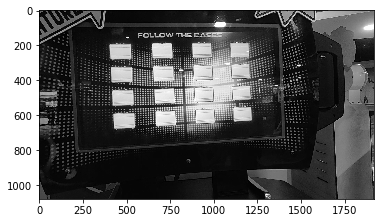

In [179]:
framecpy2 = cv2.equalizeHist(imgray)
import matplotlib.pyplot as plt
plt.imshow(imgray,cmap='gray')

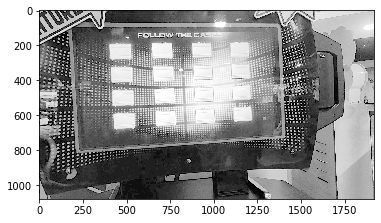

In [154]:
framecpy2 = cv2.equalizeHist(imgray)
import matplotlib.pyplot as plt
plt.imshow(framecpy2,cmap='gray')

In [103]:
a = [5,3,5,6,7]

In [104]:
a[-1]

7

In [1]:
import cv2
img = cv2.imread('chumma.png',1)

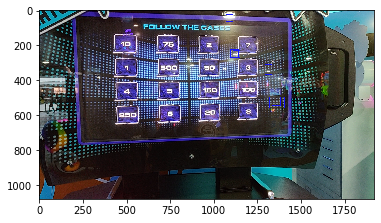

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [4]:
a , b = 2,3 
c,d = 3,4

In [ ]:
t,g = 